<a href="https://colab.research.google.com/github/annisanurrahma/Pemrograman_Python/blob/main/Tugas_Pemograman_Python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [151]:
ls

dataset2/  nndataset/  Tugas_Pemograman_Python.ipynb  Untitled0.ipynb


In [152]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os 

In [153]:
print("[INFO] Loading Gambar...")
imagePaths = paths.list_images("dataset2")
data = []
labels = []

[INFO] Loading Gambar...


In [155]:
for imagePath in imagePaths:
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)
  label = imagePath.split(os.path.sep)[-2]  
  labels.append(label)

In [156]:
print(labels)

['GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10',

In [157]:
lb = LabelBinarizer()
labels  = lb.fit_transform(labels)

In [158]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [159]:
(trainX, testX, trainY,  testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(440, 64, 64, 3)
(147, 64, 64, 3)


In [160]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16,1,1, activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32,1,1, activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 32)        544       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               819300    
_________________________________________________________________
dense_41 (Dense)             (None, 5)               

In [162]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 53ms/step - loss: 0.6407 - accuracy: 0.7568 - val_loss: 0.8972 - val_accuracy: 0.6395
Epoch 2/25
14/14 [==============================] - 1s 44ms/step - loss: 0.5432 - accuracy: 0.8159 - val_loss: 0.8081 - val_accuracy: 0.7279
Epoch 3/25
14/14 [==============================] - 1s 44ms/step - loss: 0.5143 - accuracy: 0.8250 - val_loss: 0.8794 - val_accuracy: 0.6735
Epoch 4/25
14/14 [==============================] - 1s 44ms/step - loss: 0.5428 - accuracy: 0.8023 - val_loss: 0.8247 - val_accuracy: 0.6735
Epoch 5/25
14/14 [==============================] - 1s 43ms/step - loss: 0.5044 - accuracy: 0.8318 - val_loss: 0.7902 - val_accuracy: 0.7347
Epoch 6/25
14/14 [==============================] - 1s 44ms/step - loss: 0.5105 - accuracy: 0.7909 - val_loss: 0.8619 - val_accuracy: 0.6599
Epoch 7/25
14/14 [==============================] - 1s 44ms/step - loss: 0.4831 - accuracy: 0.8455 - val_loss: 0.8398 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


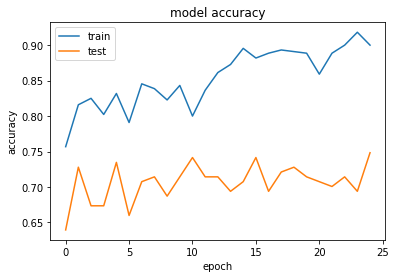

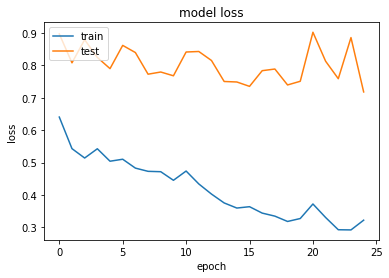

In [163]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [164]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.83      0.73      0.77        33
      GMB_05       0.65      0.60      0.63        25
      GMB_06       0.81      0.74      0.78        35
      GMB_09       0.77      0.91      0.83        22
      GMB_10       0.68      0.78      0.72        32

    accuracy                           0.75       147
   macro avg       0.75      0.75      0.75       147
weighted avg       0.75      0.75      0.75       147



In [165]:
model1.save('nndataset')

INFO:tensorflow:Assets written to: nndataset/assets
